In [1]:
import os
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

# img_path1 = "G:/Repos/GT/CS6476/ps01/ps1-1-a-1.png"
# img_path2 = "G:/Repos/GT/CS6476/ps01/ps1-1-a-2.png"


def ims(imgarr, title=None, cmap=plt.cm.gray):
    # plt.imshow(image3)
    # plt.xticks([]), plt.yticks([])
    # plt.show()
    fig, ax = plt.subplots(1, 1, dpi=125, tight_layout=False)
    ax.imshow(imgarr, cmap=cmap)
    ax.set_title("" if title is None else title, size=8)
    ax.set_axis_off()
    plt.show()

    
def mims(imlist, imtitles=None, layout=None, cmap=plt.cm.gray, figsize=(9, 5)):
    """
    Created faceted plot displaying all images in imlist.
    """
    if layout is None:
        nrow, ncol = 1, len(imlist)
    else:
        nrow, ncol = layout
    if imtitles is None:
        titles = ["image_{}".format(ii) for ii in range(len(imlist))]
    else:
        titles = imtitles
        
    fig, ax = plt.subplots(nrow, ncol, dpi=200, figsize=figsize, tight_layout=False)
    for ii, tup in enumerate(zip(imlist, titles)):
        img, img_title = tup
        ax[ii].imshow(img, cmap=cmap)
        ax[ii].set_title(img_title, size=8)
        ax[ii].set_axis_off()
    plt.show()
    

def disp_rgb(imgarr):
    """
    Create faceted quad plot of imgarr with R, G and B channels.
    """
    imgarr2 = imgarr.copy()
    
    # cv2: B, G, R
    img_names = ["full", "red", "green", "blue"]
    img_list = [imgarr2]
    for jj in range(3):
        arr = np.zeros_like(imgarr2)
        arr[:,:,jj] = imgarr2[:,:,jj]
        img_list.append(arr)
        
    fig, ax = plt.subplots(1, 4, dpi=200, figsize=(9, 5), tight_layout=False)
    for ii, tup in enumerate(zip(img_list, img_names)):
        img, img_title = tup
        ax[ii].imshow(img)
        ax[ii].set_title(img_title, size=8)
        ax[ii].set_axis_off()
    plt.show()
    
    
def find_intersection(line1, line2):
    # extract points
    x1, y1, x2, y2 = line1
    x3, y3, x4, y4 = line2
    Px = ((x1*y2 - y1*x2)*(x3-x4) - (x1-x2)*(x3*y4 - y3*x4))/ ((x1-x2)*(y3-y4) - (y1-y2)*(x3-x4))
    Py = ((x1*y2 - y1*x2)*(y3-y4) - (y1-y2)*(x3*y4 - y3*x4))/ ((x1-x2)*(y3-y4) - (y1-y2)*(x3-x4))
    return(Px, Py)

    
def bgr2rgb(img):
    B, G, R = cv2.split(img)
    return(cv2.merge([R, G, B]))
    

    

# Import functions from ps01.py.
sys.path.append("G:/Repos/GT/CS6476/ps02")
from ps2 import *
from experiment import *


In [ ]:
"""
Binary thresholding.
"""
im0 = img2.copy()
im1 = ndimage.rotate(im0, angle=171, reshape=True)
mono0 = cv2.cvtColor(im0, cv2.COLOR_BGR2GRAY)#.astype(np.float32)
mono1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)#.astype(np.float32)
blur0 = cv2.GaussianBlur(mono0, (3, 3), 0)
blur1 = cv2.GaussianBlur(mono1, (3, 3), 0)
ret0, th0 = cv2.threshold(blur0, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret1, th1 = cv2.threshold(blur1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


#ims(b2r(ndimage.rotate(img2, angle=171, reshape=False)))
ims(th0)
ims(th1)

In [ ]:
# Using denoising.
tmpl_mono_ = cv2.fastNlMeansDenoising(tmpl_mono_, None, h=37, templateWindowSize=7, searchWindowSize=21)

# P01
---


In [ ]:
  
Load images. To present images rendered properly in matplotlib, reverse the channel order.     
bgr1 = cv2.imread(img_path1)
bgr2 = cv2.imread(img_path2)

rgb1 = cv2.cvtColor(bgr1, cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(bgr2, cv2.COLOR_BGR2RGB)

# Monochrome images.
mono1 = cv2.cvtColor(bgr1, cv2.COLOR_BGR2GRAY)
mono2 = cv2.cvtColor(bgr2, cv2.COLOR_BGR2GRAY)

img1 = cv2.imread('G:/Repos/GT/CS6476/ps01/dog.bmp')
img2 = cv2.imread('G:/Repos/GT/CS6476/ps01/cat.bmp')

In [ ]:
# Split image into channels, revombine.
B, G, R = cv2.split(ima)
im2 = cv2.merge([G, B, R])


In [ ]:
# 6.
img_path = "G:/Repos/GT/CS6476/ps01/southafricaflagface.png"
img0 = cv2.imread(img_path)
B, G, R = cv2.split(img0)
mono = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)


imlist = [B, G, R]
imtitles = ["B", "G", "R"]

mult_ims(imlist, imtitles, layout=(1, 3), cmap=plt.cm.gray, figsize=(6,9))



In [ ]:
# 7.

img3 = build_hybrid_image(img1, img2, cutoff_frequency=5)
img4 = build_hybrid_image(img1, img2, cutoff_frequency=6)
img5 = build_hybrid_image(img1, img2, cutoff_frequency=8)
img6 = build_hybrid_image(img1, img2, cutoff_frequency=9)

cv2.imwrite("G:/Repos/GT/CS6476/ps01/ps1-7-a-5.png", img3)
cv2.imwrite("G:/Repos/GT/CS6476/ps01/ps1-7-a-6.png", img4)
cv2.imwrite("G:/Repos/GT/CS6476/ps01/ps1-7-a-8.png", img5)
cv2.imwrite("G:/Repos/GT/CS6476/ps01/ps1-7-a-9.png", img6)



# P02
---


In [ ]:
"""
Convert video into stream of images.
"""
out_dir = "G:/Repos/GT/CS6476/ps03/output/outvids"
cap = cv2.VideoCapture(y_path1)
ii = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==False:
        break
    frame_path = "{}/{}.png".format(out_dir, ii)
    print(frame_path)
    cv2.imwrite(frame_path, frame)
    ii+=1
cap.release()

In [21]:
# Get HSV for specified RGB.
255,165,0
green = np.uint8([[[255,255,0]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print(hsv_green)

yellow: [90 255 255]

[[[ 90 255 255]]]


In [ ]:
# This will change all pixels in image that have a value of [0,0,0] to [255,255,255].
image = np.zeros((400,400,3), dtype="uint8")
image[np.where((image==[0,0,0]).all(axis=2))] = [255,255,255]

# This will change all rows in your image that are completely black to white.
image[np.where((image==[0]).all(axis=1))] = [255]

# Change black pixels to white.
image[np.where(image == [0])] = [255]


In [ ]:
# Flip black to white and white to black.
# img = ...
# hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

targetl = np.array([0, 0, 0]) # 0, 0, 50
targetu = np.array([0, 0, 100])
mask = cv2.inRange(hsv, targetl, targetu)
mask2 = mask.copy()
white_indx = np.where(mask==255)
black_indx = np.where(mask==0)
mask2[white_indx[0],white_indx[-1]] = 0
mask2[black_indx[0],black_indx[-1]] = 255


In [ ]:
"""
Resize image maintaining aspect ratio.
"""
y_path = "G:/Repos/GT/CS6476/ps02/input_images/challenge_images/img-5-a_.png"
img_init = cv2.imread(y_path)
ar = float(img_init.shape[1]) / float(img_init.shape[0])                    
ww = 500 / ar                   
img_ = cv2.resize(img_init, (500, int(ww)))

print(img_.shape)
out_path = "G:/Repos/GT/CS6476/ps02/input_images/challenge_images/img-5-a.png"
cv2.imwrite(out_path, img_)

In [1]:
"""
RGB color codes.
"""
# Fill with colours of rainbow and greys
[255,0,0]       # red
[255,165,0]     # orange
[255,255,0]     # yellow
[0,255,0]       # green
[0,0,255]       # blue
[75,0,130]      # indigo
[238,130,238]   # violet
[0,0,0]         # black
[127,127,127]   # grey
[255,255,255]   # white
[255, 0, 255]   # pink
[95, 0, 191]    # purple
[234,255,127]   # crimson
[255, 86, 86]   # tomato
[0,255,255]     # aqua
[127,255,0]     # lime






[[[  0 255 255]
  [ 19 255 255]
  [ 30 255 255]
  [ 60 255 255]
  [120 255 255]
  [137 255 130]
  [150 116 238]
  [  0   0   0]
  [  0   0 127]
  [  0   0 255]]]


(1, 10, 3)

In [ ]:
"""
Inserting shapes. 
"""
im[0,0,:]=[255,0,0]       # red
im[0,1,:]=[255,165,0]     # orange
im[0,2,:]=[255,255,0]     # yellow
im[0,3,:]=[0,255,0]       # green
im[0,4,:]=[0,0,255]       # blue
im[0,5,:]=[75,0,130]      # indigo
im[0,6,:]=[238,130,238]   # violet
im[0,7,:]=[0,0,0]         # black
im[0,8,:]=[127,127,127]   # grey
im[0,9,:]=[255,255,255]   # white


cv2.line(img_, (x0, y0), (x1, y1), (255, 0, 0), 3)
            
cv2.putText(img_, "[{},{}]".format(x1, y1), (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (90, 90, 90), 1)

cv2.drawMarker(img_, center, (255, 0, 255), markerType=cv2.MARKER_CROSS, markerSize=45, thickness=5)
# cv2.MARKER_STAR
# cv2.MARKER_DIAMOND
# cv2.MARKER_SQUARE
# cv2.MARKER_TRIANGLE_UP
# cv2.MARKER_TRIANGLE_DOWN
# cv2.MARKER_TILTED_CROSS
# cv2.MARKER_CROSS


circles = cv2.HoughCircles(
    gray, cv2.HOUGH_GRADIENT, 1, minDist=minDist,
    param1=param1, param2=param2, minRadius=0, maxRadius=maxRadius
    )

for i in circles[0,:]:
    cv2.circle(img, (int(ii[0]),int(ii[1])),int(ii[2]), (255,255,0), 2)
    cv2.circle(img, (int(ii[0]),int(ii[1])), 2, (255,0,255), 3)
    
    
# Rectangle.
for pt in zip(*indx_[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 1)
    
    
# Draw lines.
hlines = cv2.HoughLinesP(edges, 1, np.pi / 180, 25, minLineLength=25, maxLineGap=10)
for ii in range(len(hlines)):
    for x0, y0, x1, y1 in hlines[ii]:
        cv2.line(img, (x0, y0), (x1, y1), (0, 255, 255), 3)

In [ ]:
"""
Denoising.
"""
dst = cv2.fastNlMeansDenoising(mono, h=17, templateWindowSize=7, searchWindowSize=21)



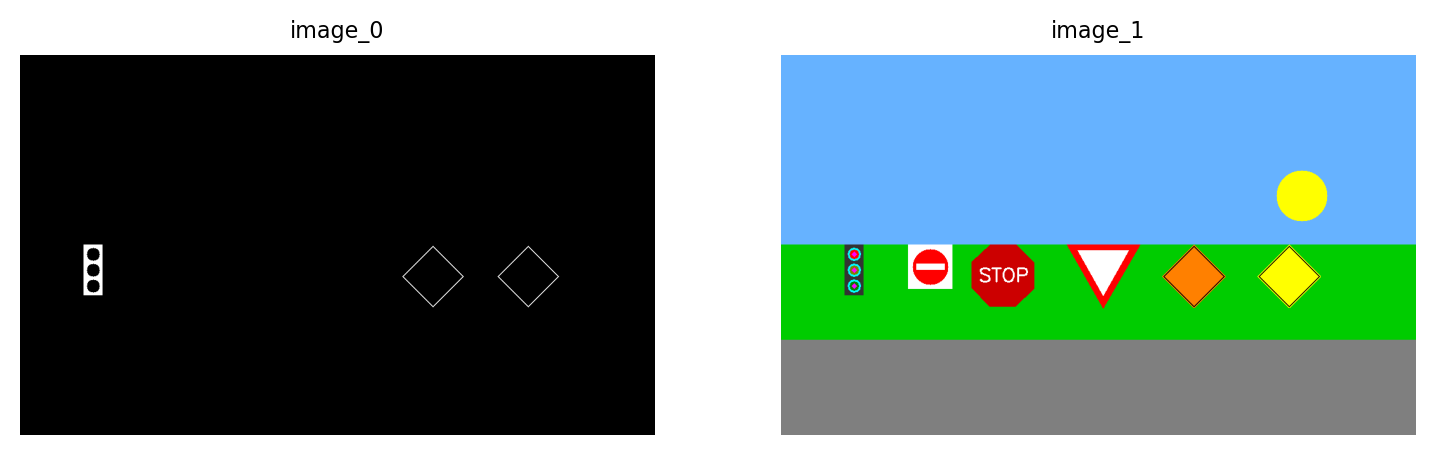

In [69]:
img = img8.copy()
hsv = hsv8.copy()

# mono = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
targetl = np.array([0, 0, 0]) # 0, 0, 50
targetu = np.array([0, 0, 100])

# Threshold the HSV image to get only target colors.
mask = cv2.inRange(hsv, targetl, targetu)

mask2 = mask.copy()
white_indx = np.where(mask==255)
black_indx = np.where(mask==0)
mask2[white_indx[0],white_indx[-1]] = 0
mask2[black_indx[0],black_indx[-1]] = 255

radii_range = range(30)
radii_min = 0 if min(radii_range)<0 else min(radii_range)
radii_max = 40 if max(radii_range)<40 else list(radii_range)[-1]
circles = cv2.HoughCircles(
    mask, cv2.HOUGH_GRADIENT, 1, minDist=20, param1=30, param2=15,
    minRadius=0, maxRadius=100
    )

for ii in circles[0,:]:
    cv2.circle(img, (int(ii[0]),int(ii[1])),int(ii[2]), (255,255,0), 2)
    cv2.circle(img, (int(ii[0]),int(ii[1])), 2, (255,0,255), 3)

mims([mask, bgr2rgb(img)])


In [38]:
mask.shape

(600, 1000)

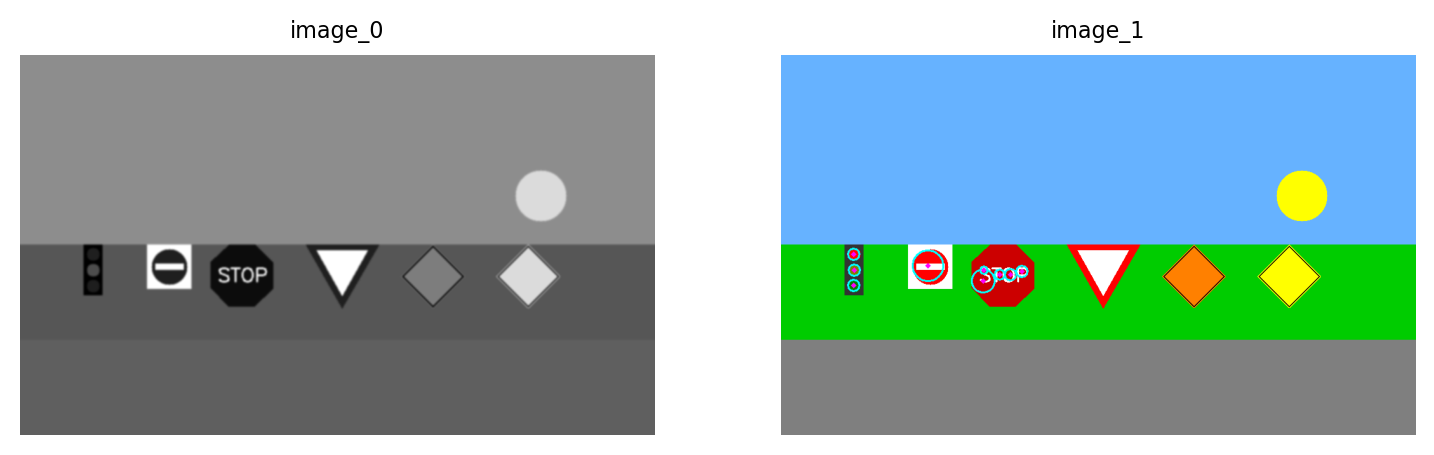

In [19]:
blur = cv2.GaussianBlur(img, (7,7), 0)
mono = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)[:,:,2]
radii_range = range(30)
radii_min = 0 if min(radii_range)<0 else min(radii_range)
radii_max = 40 if max(radii_range)<40 else list(radii_range)[-1]
circles = cv2.HoughCircles(
    mono, cv2.HOUGH_GRADIENT, 1, minDist=12, param1=30, param2=15,
    minRadius=5, maxRadius=25
    )

for ii in circles[0,:]:
    cv2.circle(img, (int(ii[0]),int(ii[1])),int(ii[2]), (255,255,0), 2)
    cv2.circle(img, (int(ii[0]),int(ii[1])), 2, (255,0,255), 3)

mims([mono, bgr2rgb(img)])

In [11]:
"""
Part 2.
"""
img_path0 = "G:/Repos/GT/CS6476/ps02/input_images/scene_dne_1.png"
img_path1 = "G:/Repos/GT/CS6476/ps02/input_images/scene_stp_1.png"
img_path2 = "G:/Repos/GT/CS6476/ps02/input_images/scene_constr_1.png"
img_path3 = "G:/Repos/GT/CS6476/ps02/input_images/scene_wrng_1.png"
img_path4 = "G:/Repos/GT/CS6476/ps02/input_images/scene_yld_1.png"
img_path5 = "G:/Repos/GT/CS6476/ps02/input_images/test_images/scene_all_signs.png"


img0 = cv2.imread(img_path0)
img1 = cv2.imread(img_path1)
img2 = cv2.imread(img_path2)
img3 = cv2.imread(img_path3)
img4 = cv2.imread(img_path4)
img5 = cv2.imread(img_path5)

rgb0 = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)
rgb1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
rgb3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
rgb4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
rgb5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

mono0 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
mono1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
mono2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
mono3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
mono4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
mono5 = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)

hsv0 = cv2.cvtColor(img0, cv2.COLOR_BGR2HSV)
hsv1 = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
hsv2 = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
hsv3 = cv2.cvtColor(img3, cv2.COLOR_BGR2HSV)
hsv4 = cv2.cvtColor(img4, cv2.COLOR_BGR2HSV)
hsv5 = cv2.cvtColor(img5, cv2.COLOR_BGR2HSV)


# Yield images.
y_path0 = "G:/Repos/GT/CS6476/ps02/input_images/scene_yld_1.png"
y_img0 = cv2.imread(y_path0)
y_rgb0 = cv2.cvtColor(y_img0, cv2.COLOR_BGR2RGB)
y_hsv0 = cv2.cvtColor(y_img0, cv2.COLOR_BGR2HSV)

y_path1 = "G:/Repos/GT/CS6476/ps02/input_images/test_images/yield_173_358_background.png"
y_img1 = cv2.imread(y_path1)
y_rgb1 = cv2.cvtColor(y_img1, cv2.COLOR_BGR2RGB)
y_hsv1 = cv2.cvtColor(y_img1, cv2.COLOR_BGR2HSV)

y_path2 = "G:/Repos/GT/CS6476/ps02/input_images/test_images/scene_all_signs.png"
y_img2 = cv2.imread(y_path2)
y_rgb2 = cv2.cvtColor(y_img2, cv2.COLOR_BGR2RGB)
y_hsv2 = cv2.cvtColor(y_img2, cv2.COLOR_BGR2HSV)

y_path3 = "G:/Repos/GT/CS6476/ps02/input_images/test_images/yield_173_358_blank.png"
y_img3 = cv2.imread(y_path3)
y_rgb3 = cv2.cvtColor(y_img3, cv2.COLOR_BGR2RGB)
y_hsv3 = cv2.cvtColor(y_img3, cv2.COLOR_BGR2HSV)

y_path4 = "G:/Repos/GT/CS6476/ps02/input_images/scene_all_signs_noisy.png"
y_img4 = cv2.imread(y_path4)
y_rgb4 = cv2.cvtColor(y_img4, cv2.COLOR_BGR2RGB)
y_hsv4 = cv2.cvtColor(y_img4, cv2.COLOR_BGR2HSV)

y_path5 = "G:/Repos/GT/CS6476/ps02/input_images/noisy_scene_all_signs.png"
y_img5 = cv2.imread(y_path5)
y_rgb5 = cv2.cvtColor(y_img5, cv2.COLOR_BGR2RGB)
y_hsv5 = cv2.cvtColor(y_img5, cv2.COLOR_BGR2HSV)


In [ ]:
"""
HoughLines.
"""
img_ = img5.copy()
hsv_ = hsv5.copy()
rgb_ = rgb5.copy()

lower_white = np.array([0,0,0])
upper_white = np.array([0,0,255])

# Threshold the HSV image to get only white colors
mask = cv2.inRange(hsv_, lower_white, upper_white)

# Bitwise-AND mask and original image
# res = cv2.bitwise_and(img_, img_, mask=mask)
edges = cv2.Canny(mask, 50, 150)
lines0 = cv2.HoughLines(edges, 1, np.pi/180, 57)

dlines = {}
valid_angles = [30, 90, 150,]
for ii in range(len(lines0)):
    rho = lines0[ii][0][0]
    theta = lines0[ii][0][1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    #print("rho  : {}".format(rho))
    theta1 = theta * 180 / np.pi
    
    ldict = {
        "rho":rho, "theta_rad":theta, "a":a, "b":b, 
        "x0":x0, "y0":y0, "theta_deg":theta1,
        }
    
    diffs = np.asarray([np.abs(theta1-jj) for jj in valid_angles])
    print(diffs)
    print(diffs[diffs<1])
    if diffs[diffs<1].size>0:
        dlines[ii] = ldict

        # if np.abs(90 - theta1)>5 and np.abs(theta1)>5:
        cv2.line(img_, pt1, pt2, (0,0,255), 2, cv2.LINE_AA)
        
        
mims([edges, bgr2rgb(img_)])

for jj in dlines:
    print(dlines[jj])





In [79]:
"""
Yield sign.
"""
# Invert image.
# maski = cv2.bitwise_not(mask)

# Bitwise-AND mask and original image
edges = cv2.Canny(mask, 50, 200)
lines1 = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, minLineLength=30, maxLineGap=50)

all_lines = []

for ii in range(len(lines1)):
    
    for x0, y0, x1, y1 in lines1[ii]:

        if np.abs(x1 - x0)<.01:
            slope_ = np.NaN
        else:
            slope_ = (y1 - y0) / (x1 - x0)
            
        l_ = np.sqrt((y1 - y0)**2 + (x1 - x0)**2)
        
        # If line segment doesn't span full image height or width.
        # If slope of line is not infinite (vertical line). 
        # If slope of line is not horizontal.
        if l_ < min(img_.shape[:-1]) and not np.isnan(slope_) and np.abs(slope_)>.05:
            ldict = {
                "x0":x0, "y0":y0, "x1":x1, "y1":y1, "slope": slope_, 
                "intercept": -slope_ * x0 + y0, "len":l_, "ap":(x0, y0, x1, y1),
                }
            
            all_lines.append(ldict)

     
    
# Drop parallel lines.
if len(all_lines)>2:
    dpos = [dd for dd in all_lines if dd["slope"]>0][0]
    dneg = [dd for dd in all_lines if dd["slope"]<0][0]

    for ldict in all_lines:
        m, x0, y0, x1, y1 = ldict["slope"], ldict["x0"], ldict["y0"], ldict["x1"], ldict["y1"]
        if m > 0:
            ref_m, ref_x0, ref_y0, ref_x1, ref_y1 = dpos["slope"], dpos["x0"], dpos["y0"], dpos["x1"], dpos["y1"]
            if np.abs((ref_m - m) / ref_m)<=.03:
                if (x0 > ref_x0) and (x1 > ref_x1):
                    dpos = ldict
        if m < 0:
            ref_m, ref_x0, ref_y0, ref_x1, ref_y1 = dneg["slope"], dneg["x0"], dneg["y0"], dneg["x1"], dneg["y1"]
            if np.abs((ref_m - m) / ref_m)<=.03:
                if (x0 > ref_x0) and (x1 > ref_x1):
                    dneg = ldict

    lines = [dpos, dneg]
else:
    lines = all_lines
    

for dd in lines:
    x0, y0, x1, y1 = dd["x0"], dd["y0"], dd["x1"], dd["y1"]
    cv2.line(img_, (x0, y0), (x1, y1), (255, 0, 0), 3)


          
# Compute intersection of line segments found in dlines. 
verts = []
for ii in range(1, len(lines)):
    d0, d1 = lines[ii-1], lines[ii]
    a, c, b, d = d0["slope"], d0["intercept"], d1["slope"], d1["intercept"]
    xint = (d - c) / (a - b) 
    yint = a * xint + c
    verts.append((int(xint), int(yint)))
    
all_verts = verts  
vx, vy = verts[0]

# Find points coincident with identified vertex. 
for jj in range(len(lines)):
    x0, y0, x1, y1 = lines[jj]["x0"], lines[jj]["y0"], lines[jj]["x1"], lines[jj]["y1"]
    
    if np.abs((x0 - vx) / vx)>.03:
        synth_vert = (int(x0), int(y0))
        
    elif np.abs((x1 - vx) / vx)>.03:
        synth_vert = (int(x1), int(y1))
        
    all_verts.append(synth_vert)
    
# Mark center of yield sign. 
x_verts, y_verts = zip(*list(set(all_verts)))
center = (int(np.mean(x_verts)), int(np.mean(y_verts)))
cv2.drawMarker(img_, center, (255, 0, 255), markerType=cv2.MARKER_CROSS, markerSize=20, thickness=2)
cv2.putText(img_, "[{},{}]".format(center[0], center[-1]), (center[0]+30, center[1]+30), cv2.FONT_HERSHEY_SIMPLEX, .50, (0, 0, 0), 1)

# Display image with highlighted center. 
ims(bgr2rgb(img_))

In [ ]:
# define range of green color in HSV
# https://en.wikipedia.org/wiki/HSL_and_HSV#Examples
target_hue = 255
target_inc = 10

targetl = np.array([np.min([0, target_hue - target_inc]), 100, 100])
targetu = np.array([np.max([target_hue + target_inc, 255]), 255, 255])

# Threshold the HSV image to get only target colors.
mask = cv2.inRange(hsv_, targetl, targetu)

# Bitwise-AND mask with original image.
bwa = cv2.bitwise_and(img_, img_, mask=mask)

# Convert bwa to greyscale.
mono = cv2.cvtColor(bwa, cv2.COLOR_BGR2GRAY)

# Detect edges. 
edges = cv2.Canny(mono, 50, 150, apertureSize=3)

lines0 = cv2.HoughLines(edges, 1, np.pi/180, 60)
# lines1 = cv2.HoughLinesP(edges, 1, np.pi / 180, 60, minLineLength=10, maxLineGap=50)

# minLineLength = 30
# maxLineGap = 10
# lines = cv2.HoughLinesP(edges,1,np.pi/180,15,minLineLength=minLineLength,maxLineGap=maxLineGap)
# slope_list = []
# for ii in range(len(lines1)):
#     for x0, y0, x1, y1 in lines1[ii]:
        
#         m_ = (y1 - y0) / (x1 - x0)
#         slope_list.append(m_)
        
#         cv2.line(img_, (x0, y0), (x1, y1), (0, 255, 255), 3)
#         cv2.putText(img_, "[{},{}]".format(x1, y1), (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (90, 90, 90), 1)

        
for ii in range(len(lines0)):
    rho = lines0[ii][0][0]
    theta = lines0[ii][0][1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    #print("rho  : {}".format(rho))
    theta1 = theta * 180 / np.pi
    if np.abs(90 - theta1)>5:
        cv2.line(img_, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)


# mult_ims([mono, bwa, edges, bgr2rgb(img_)])
ims(bgr2rgb(bwa))


print("lines0.shape: {}".format(lines0.shape))
print("lines1.shape: {}".format(lines1.shape))

In [ ]:

# Image thresholding for red pixels.
img=cv2.imread("img.bmp")
img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# lower mask (0-10)
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([170,50,50])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# join my masks
mask = mask0+mask1

# set my output img to zero everywhere except my mask
output_img = img.copy()
output_img[np.where(mask==0)] = 0

# or your HSV image, which I *believe* is what you want
output_hsv = img_hsv.copy()
output_hsv[np.where(mask==0)] = 0

In [383]:
"""
Construction sign.
"""
# Yield images.
# y_path0 = "G:/Repos/GT/CS6476/ps02/input_images/scene_constr_1.png"
# y_img0 = cv2.imread(y_path0)
# y_rgb0 = cv2.cvtColor(y_img0, cv2.COLOR_BGR2RGB)
# y_hsv0 = cv2.cvtColor(y_img0, cv2.COLOR_BGR2HSV)

# y_path1 = "G:/Repos/GT/CS6476/ps02/input_images/scene_all_signs.png"
# y_img1 = cv2.imread(y_path1)
# y_rgb1 = cv2.cvtColor(y_img1, cv2.COLOR_BGR2RGB)
# y_hsv1 = cv2.cvtColor(y_img1, cv2.COLOR_BGR2HSV)

# y_path2 = "G:/Repos/GT/CS6476/ps02/input_images/test_images/construction_test.png"
# y_img2 = cv2.imread(y_path2)
# y_rgb2 = cv2.cvtColor(y_img2, cv2.COLOR_BGR2RGB)
# y_hsv2 = cv2.cvtColor(y_img2, cv2.COLOR_BGR2HSV)

# y_path3 = "G:/Repos/GT/CS6476/ps02/input_images/test_images/construction_150_200_blank.png"
# y_img3 = cv2.imread(y_path3)
# y_rgb3 = cv2.cvtColor(y_img3, cv2.COLOR_BGR2RGB)
# y_hsv3 = cv2.cvtColor(y_img3, cv2.COLOR_BGR2HSV)


# Warning sign.
# y_path0 = "G:/Repos/GT/CS6476/ps02/input_images/test_images/warning_250_300_blank.png"
# y_img0 = cv2.imread(y_path0)
# y_hsv0 = cv2.cvtColor(y_img0, cv2.COLOR_BGR2HSV)

# y_path1 = "G:/Repos/GT/CS6476/ps02/input_images/test_images/warning_250_300_background.png"
# y_img1 = cv2.imread(y_path1)
# y_hsv1 = cv2.cvtColor(y_img1, cv2.COLOR_BGR2HSV)

# y_path2 = "G:/Repos/GT/CS6476/ps02/input_images/test_images/scene_some_signs.png"
# y_img2 = cv2.imread(y_path2)
# y_hsv2 = cv2.cvtColor(y_img2, cv2.COLOR_BGR2HSV)

# y_path3 = "G:/Repos/GT/CS6476/ps02/input_images/scene_wrng_1.png"
# y_img3 = cv2.imread(y_path3)
# y_hsv3 = cv2.cvtColor(y_img3, cv2.COLOR_BGR2HSV)

# y_path4 = "G:/Repos/GT/CS6476/ps02/input_images/scene_all_signs.png"
# y_img4 = cv2.imread(y_path4)
# y_hsv4 = cv2.cvtColor(y_img4, cv2.COLOR_BGR2HSV)



# Do not enter.
y_path0 = "G:/Repos/GT/CS6476/ps02/input_images/test_images/no_entry_145_145_blank.png"
y_img0 = cv2.imread(y_path0)
y_hsv0 = cv2.cvtColor(y_img0, cv2.COLOR_BGR2HSV)

y_path1 = "G:/Repos/GT/CS6476/ps02/input_images/test_images/no_entry_145_145_background.png"
y_img1 = cv2.imread(y_path1)
y_hsv1 = cv2.cvtColor(y_img1, cv2.COLOR_BGR2HSV)

y_path2 = "G:/Repos/GT/CS6476/ps02/input_images/test_images/scene_some_signs.png"
y_img2 = cv2.imread(y_path2)
y_hsv2 = cv2.cvtColor(y_img2, cv2.COLOR_BGR2HSV)

y_path3 = "G:/Repos/GT/CS6476/ps02/input_images/scene_dne_1.png"
y_img3 = cv2.imread(y_path3)
y_hsv3 = cv2.cvtColor(y_img3, cv2.COLOR_BGR2HSV)

y_path4 = "G:/Repos/GT/CS6476/ps02/input_images/scene_all_signs.png"
y_img4 = cv2.imread(y_path4)
y_hsv4 = cv2.cvtColor(y_img4, cv2.COLOR_BGR2HSV)


# Stop sign.
y_path0 = "G:/Repos/GT/CS6476/ps02/input_images/test_images/stop_249_149_blank.png"
y_img0 = cv2.imread(y_path0)
y_hsv0 = cv2.cvtColor(y_img0, cv2.COLOR_BGR2HSV)

y_path1 = "G:/Repos/GT/CS6476/ps02/input_images/test_images/stop_test.png"
y_img1 = cv2.imread(y_path1)
y_hsv1 = cv2.cvtColor(y_img1, cv2.COLOR_BGR2HSV)

y_path2 = "G:/Repos/GT/CS6476/ps02/input_images/test_images/stop_249_149_background.png"
y_img2 = cv2.imread(y_path2)
y_hsv2 = cv2.cvtColor(y_img2, cv2.COLOR_BGR2HSV)

y_path3 = "G:/Repos/GT/CS6476/ps02/input_images/test_images/scene_some_signs.png"
y_img3 = cv2.imread(y_path3)
y_hsv3 = cv2.cvtColor(y_img3, cv2.COLOR_BGR2HSV)

y_path4 = "G:/Repos/GT/CS6476/ps02/input_images/scene_stp_1.png"
y_img4 = cv2.imread(y_path4)
y_hsv4 = cv2.cvtColor(y_img4, cv2.COLOR_BGR2HSV)

y_path5 = "G:/Repos/GT/CS6476/ps02/input_images/scene_all_signs.png"
y_img5 = cv2.imread(y_path5)
y_hsv5 = cv2.cvtColor(y_img5, cv2.COLOR_BGR2HSV)


# y_path5 = "G:/Repos/GT/CS6476/ps02/input_images/noisy_scene_all_signs.png"
# y_img5 = cv2.imread(y_path5)
# y_rgb5 = cv2.cvtColor(y_img5, cv2.COLOR_BGR2RGB)
# y_hsv5 = cv2.cvtColor(y_img5, cv2.COLOR_BGR2HSV)

# y_path4 = "G:/Repos/GT/CS6476/ps02/input_images/scene_all_signs_noisy.png"
# y_img4 = cv2.imread(y_path4)
# y_rgb4 = cv2.cvtColor(y_img4, cv2.COLOR_BGR2RGB)
# y_hsv4 = cv2.cvtColor(y_img4, cv2.COLOR_BGR2HSV)


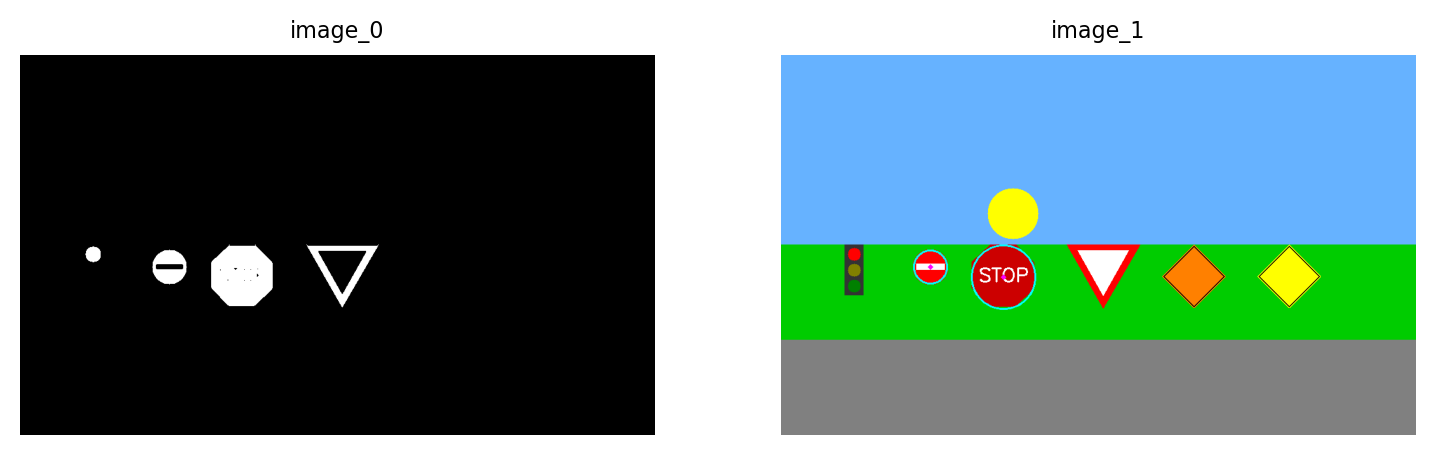

In [458]:
"""
Stop sign.
"""
img = y_img5.copy()

# red.
lower = np.array([0,50,50])
upper= np.array([10,255,255])

# white.
# lower = np.array([0, 0, 200])
# upper = np.array([0, 0, 255])

blur = cv2.GaussianBlur(img, (7,7), 0)
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, lower, upper)
edges = cv2.Canny(mask, 50, 200)
hlines = cv2.HoughLinesP(edges, 1, np.pi / 180, 5, minLineLength=10, maxLineGap=1)
circles = cv2.HoughCircles(
    mask, cv2.HOUGH_GRADIENT, 1, minDist=25, param1=30, param2=15,
        minRadius=20, maxRadius=100
        )

stop_circle = circles[0, 0]
for arr in circles[0,:]:
    if arr[-1]>stop_circle[-1]:
        stop_circle = arr
        
center = (int(stop_circle[0]), int(stop_circle[1]))



        
    
        
# for dd in keep_lines:
#     x0, y0, x1, y1 = dd["x0"], dd["y0"], dd["x1"], dd["y1"]
#     cv2.line(img, (x0, y0), (x1, y1), (255, 0, 0),3)
for i in circles[0,:]:
    cv2.circle(img, (int(i[0]), int(i[1])), int(i[2]), (255, 255, 0), 2)
    cv2.circle(img, (int(i[0]), int(i[1])), 2, (255, 0, 255), 3)    

               
mims([mask, bgr2rgb(img)])




In [460]:
stop_circle[0]

350.5

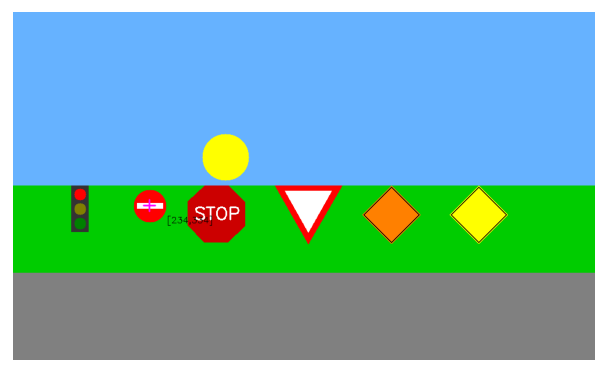

In [382]:
"""
Do not enter sign.
"""
img = y_img4.copy()

# red.
# lower = np.array([0,50,50])
# upper= np.array([10,255,255])

# white.
lower = np.array([0, 0, 200])
upper = np.array([0, 0, 255])

blur = cv2.GaussianBlur(img, (5,5), 0)
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, lower, upper)
edges = cv2.Canny(mask, 50, 200)
hlines = cv2.HoughLinesP(edges, 1, np.pi / 180, 25, minLineLength=30, maxLineGap=50)

all_lines = []
for ii in range(len(hlines)):
    for x0, y0, x1, y1 in hlines[ii]:
        if np.abs(x1 - x0)<.01:
            slope_ = np.NaN
        else:
            slope_ = (y1 - y0) / (x1 - x0)
        l_ = np.sqrt((y1 - y0)**2 + (x1 - x0)**2)
        ldict = {
            "x0":x0, "y0":y0, "x1":x1, "y1":y1, "slope": slope_, 
            "intercept": -slope_ * x0 + y0, "len":l_, "ap":(x0, y0, x1, y1),
            "id":ii,
            }
        all_lines.append(ldict)

keep_lines_horiz = [
    dd for dd in all_lines if not np.isnan(dd["slope"]) and np.abs(dd["slope"])<.035
    ]   

if len(keep_lines_horiz)>2:
    keep_lines = []
    for ldict in keep_lines_horiz:
        dd_id = ldict["id"]
        comp_list = [d for d in keep_lines_horiz if d["id"]!=dd_id]
        for dd in comp_list:
            # if np.abs((ldict["len"] - dd["len"]) / np.max([ldict["len"], dd["len"]]))<.03:
            if np.abs((ldict["y0"] - dd["y0"]) / np.max([ldict["y0"], dd["y0"]]))<.015:
                curr_ids = [dd_["id"] for dd_ in keep_lines]
                if ldict["id"] not in curr_ids:
                    keep_lines.append(ldict)
                if dd["id"] not in curr_ids:
                    keep_lines.append(dd)
else:
    keep_lines = keep_lines_horiz
    

# Determine center of sign. 
x0, y0, x1, y1 = keep_lines[0]["ap"]
x2, y2, x3, y3 = keep_lines[-1]["ap"]

center_x = (x0 + x1 + x2 + x3) / 4
center_y = (y0 + y1 + y2 + y3) / 4
center = (int(center_x), int(center_y))


# for dd in keep_lines:
#     x0, y0, x1, y1 = dd["x0"], dd["y0"], dd["x1"], dd["y1"]
#     cv2.line(img, (x0, y0), (x1, y1), (255, 0, 0),3)


# mims([mask, bgr2rgb(img)])

cv2.drawMarker(img, center, (255, 0, 255), markerType=cv2.MARKER_CROSS, markerSize=20, thickness=2)
cv2.putText(img, "[{},{}]".format(center[0], center[-1]), (center[0]+30, center[1]+30), cv2.FONT_HERSHEY_SIMPLEX, .50, (0, 0, 0), 1)

# Mark lines.
# for dd in keep_lines:
#     x0, y0, x1, y1 = dd["x0"], dd["y0"], dd["x1"], dd["y1"]
#     cv2.line(img, (x0, y0), (x1, y1), (255, 0, 0),3)


# mims([mask, bgr2rgb(img)])
ims(bgr2rgb(img))


In [349]:

keep_lines = []
while len(keep_lines)==0:
    for ldict in keep_lines0:
        dd_id = ldict["id"]
        comp_list = [d for d in keep_lines0 if d["id"]!=dd_id]
        for dd in comp_list:
            if np.abs((ldict["len"] - dd["len"]) / np.max([ldict["len"], dd["len"]]))<.03:
                curr_ids = [dd_["id"] for dd_ in keep_lines]
                if ldict["id"] not in curr_ids:
                    keep_lines.append(ldict)
                if dd["id"] not in curr_ids:
                    keep_lines.append(dd)
                break

    

print(len(keep_lines))
print(keep_lines)
        
    
    
   
    
    
    
    
    



2
[{'x0': 215, 'y0': 337, 'x1': 255, 'y1': 337, 'slope': 0.0, 'intercept': 337.0, 'len': 40.0, 'ap': (215, 337, 255, 337), 'id': 3}, {'x0': 215, 'y0': 332, 'x1': 254, 'y1': 331, 'slope': -0.02564102564102564, 'intercept': 337.5128205128205, 'len': 39.01281840626232, 'ap': (215, 332, 254, 331), 'id': 4}]


In [340]:
(39.01281840626232 - 40) / 40

-0.02467953984344202

In [335]:
for dd in keep_lines0:
    print(dd["ap"])
    
    
ll = [dd["ap"] for dd in all_lines]

import itertools

pp = list(itertools.product(ll))

len(pp)


(471, 310, 543, 310)
(215, 337, 255, 337)
(215, 332, 254, 331)


5

In [334]:
(331 - 337) / 337

-0.017804154302670624

In [336]:
len(all_lines)

5

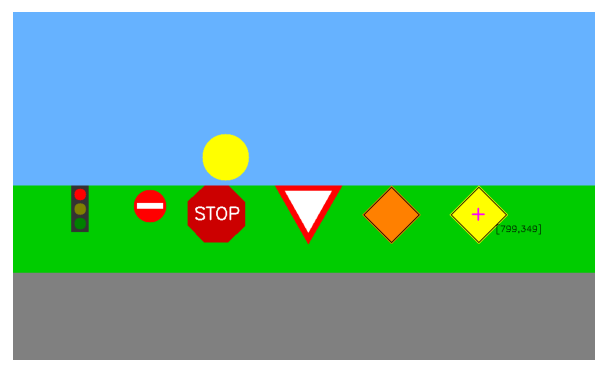

In [199]:
"""
Construction sign.
"""
img = y_img4.copy()


lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([40, 255, 255])

# lower_orange = np.array([5, 100, 100])
# upper_orange = np.array([25, 255, 255])

blur = cv2.medianBlur(img, 5)
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)

# Threshold the HSV image to get only white pixels.
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
edges = cv2.Canny(mask, 50, 200)
hlines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, minLineLength=30, maxLineGap=20)

all_lines = []
for ii in range(len(hlines)):
    
    for x0, y0, x1, y1 in hlines[ii]:

        if np.abs(x1 - x0)<.01:
            slope_ = np.NaN
        else:
            slope_ = (y1 - y0) / (x1 - x0)
            
        l_ = np.sqrt((y1 - y0)**2 + (x1 - x0)**2)
        
        # If line segment doesn't span full image height or width.
        # If slope of line is not infinite (vertical line). 
        # If slope of line is not horizontal.
        if l_ < min(img_.shape[:-1]) and not np.isnan(slope_) and np.abs(slope_)>.05:
            ldict = {
                "x0":x0, "y0":y0, "x1":x1, "y1":y1, "slope": slope_, 
                "intercept": -slope_ * x0 + y0, "len":l_, "ap":(x0, y0, x1, y1),
                }
            
            all_lines.append(ldict)

# Get two negative and two positive sloped lines.
m_pos_all = [dd for dd in all_lines if dd["slope"]>0]#[:2]
m_neg_all = [dd for dd in all_lines if dd["slope"]<0]#[:2]

if len(m_pos_all)!=2 or len(m_neg_all)!=2:
    # Find detected lines split point. 
    x0_avg_pos = np.mean([dd["x0"] for dd in m_pos_all])
    x0_avg_neg = np.mean([dd["x0"] for dd in m_neg_all])

    m_pos_lt = [dd for dd in m_pos_all if dd["x0"]<=x0_avg_pos]
    m_pos_gt = [dd for dd in m_pos_all if dd["x0"]>x0_avg_pos]
    m_neg_lt = [dd for dd in m_neg_all if dd["x0"]<=x0_avg_neg]
    m_neg_gt = [dd for dd in m_neg_all if dd["x0"]>x0_avg_neg]

    keep_lines = [
        m_pos_lt[0], m_pos_gt[0], m_neg_lt[0], m_neg_gt[0]
        ]
    ll_list = [
        m_pos_lt, m_pos_gt, m_neg_lt, m_neg_gt,
        ]

    thresh = .075
    for ll in ll_list:
        dref = ll[0]
        for dcur in ll[1:]:
            # dcur = m_pos_lt[jj]
            ref_x0, ref_x1 = dref["x0"], dref["x1"]
            cur_x0, cur_x1 = dcur["x0"], dcur["x1"] 
            ref_y0, ref_y1 = dref["y0"], dref["y1"]
            cur_y0, cur_y1 = dcur["y0"], dcur["y1"] 
            x0_err = np.abs((ref_x0 - cur_x0) / np.max([ref_x0, cur_x0]))
            x1_err = np.abs((ref_x1 - cur_x1) / np.max([ref_x1, cur_x1]))
            if np.any([x0_err>thresh, x1_err>thresh]):
                keep_lines.append(dcur)


    m_pos = [dd for dd in keep_lines if dd["slope"]>0][:2]
    m_neg = [dd for dd in keep_lines if dd["slope"]<0][:2]

else:
    m_pos, m_neg = m_pos_all, m_neg_all

        
# Get intersection of each line in m_pos with each line in m_neg. 
all_verts = []      
for d0 in m_pos:
    for d1 in m_neg:
        a, c, b, d = d0["slope"], d0["intercept"], d1["slope"], d1["intercept"]
        xint = (d - c) / (a - b) 
        yint = a * xint + c
        all_verts.append((int(xint), int(yint)))        
        
        
# for x, y in all_verts:
#     cv2.drawMarker(img_, (x, y), (255, 0, 255), markerType=cv2.MARKER_CROSS, markerSize=15, thickness=2)
# ims(bgr2rgb(img_))

# Mark lines.
# for dd in all_lines:
#     x0, y0, x1, y1 = dd["x0"], dd["y0"], dd["x1"], dd["y1"]
#     cv2.line(img, (x0, y0), (x1, y1), (255, 0, 0),2)


# Mark center of construction sign. 
x_verts, y_verts = zip(*list(set(all_verts)))
center = (int(np.mean(x_verts)), int(np.mean(y_verts)))
cv2.drawMarker(img, center, (255, 0, 255), markerType=cv2.MARKER_CROSS, markerSize=20, thickness=2)
cv2.putText(img, "[{},{}]".format(center[0], center[-1]), (center[0]+30, center[1]+30), cv2.FONT_HERSHEY_SIMPLEX, .50, (0, 0, 0), 1)


# Display image with highlighted center. 
ims(bgr2rgb(img))


In [197]:
len(all_lines)

4

Filter out any noise. The Gaussian filter is used for this purpose. 
An example of a Gaussian kernel of size=5 that might be used is shown below:

https://docs.opencv.org/3.4/da/d5c/tutorial_canny_detector.html